<a href="https://colab.research.google.com/github/iam-fern/Generate_addition_4X/blob/main/GQtest_cluster_data_add_delta_(_1_6)_n30_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition_4X/addition_delta_-1.6'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_-1.6_n30.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,97.627627,64.400799,97.467128,32.858249,-0.031123,302.322679,302.380060,-0.057381
1,0.0,1.0,43.018224,44.996767,39.449280,24.467870,-0.020343,161.911798,161.917153,-0.005355
2,0.0,2.0,93.492334,27.923272,95.173299,72.450629,0.134796,299.174331,299.082040,0.092290
3,0.0,3.0,36.104333,65.649404,71.669725,81.336914,0.007989,264.768364,264.757903,0.010461
4,0.0,4.0,92.177474,52.276004,55.409760,78.710168,-0.007144,288.566262,288.584806,-0.018544
...,...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,43.883015,49.813406,65.910820,66.492186,0.073494,236.172921,236.111185,0.061736
29996,999.0,26.0,95.753478,76.669335,21.266649,21.189239,-0.004166,224.874536,224.888264,-0.013729
29997,999.0,27.0,57.946411,40.635097,85.387932,50.713656,0.081700,244.764796,244.706242,0.058554
29998,999.0,28.0,40.913988,34.881131,48.952482,92.409682,0.037084,227.194366,227.170761,0.023605


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    97.627627  64.400799  97.467128  32.858249 -0.031123  302.322679   
      1.0    43.018224  44.996767  39.449280  24.467870 -0.020343  161.911798   
      2.0    93.492334  27.923272  95.173299  72.450629  0.134796  299.174331   
      3.0    36.104333  65.649404  71.669725  81.336914  0.007989  264.768364   
      4.0    92.177474  52.276004  55.409760  78.710168 -0.007144  288.566262   
...                ...        ...        ...        ...       ...         ...   
999.0 25.0   43.883015  49.813406  65.910820  66.492186  0.073494  236.172921   
      26.0   95.753478  76.669335  21.266649  21.189239 -0.004166  224.874536   
      27.0   57.946411  40.635097  85.387932  50.713656  0.081700  244.764796   
      28.0   40.913988  34.881131  48.952482  92.409682  0.037084  227.194366   
      29.0   76.526607  34.004183  52.877466  33.172050 -0.072254  206.508052   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    302.380060 -0.057381  
      1.0    161.917153 -0.005355  
      2.0    299.082040  0.092290  
      3.0    264.757903  0.010461  
      4.0    288.584806 -0.018544  
...                 ...       ...  
999.0 25.0   236.111185  0.061736  
      26.0   224.888264 -0.013729  
      27.0   244.706242  0.058554  
      28.0   227.170761  0.023605  
      29.0   206.606376 -0.098325  

[30000 rows x 8 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    97.627627  64.400799  97.467128  32.858249 -0.031123  302.322679   
      1.0    43.018224  44.996767  39.449280  24.467870 -0.020343  161.911798   
      2.0    93.492334  27.923272  95.173299  72.450629  0.134796  299.174331   
      3.0    36.104333  65.649404  71.669725  81.336914  0.007989  264.768364   
      4.0    92.177474  52.276004  55.409760  78.710168 -0.007144  288.566262   
...                ...        ...        ...        ...       ...         ...   
999.0 25.0   43.883015  49.813406  65.910820  66.492186  0.073494  236.172921   
      26.0   95.753478  76.669335  21.266649  21.189239 -0.004166  224.874536   
      27.0   57.946411  40.635097  85.387932  50.713656  0.081700  244.764796   
      28.0   40.913988  34.881131  48.952482  92.409682  0.037084  227.194366   
      29.0   76.526607  34.004183  52.877466  33.172050 -0.072254  206.508052   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    302.380060 -0.057381  
      1.0    161.917153 -0.005355  
      2.0    299.082040  0.092290  
      3.0    264.757903  0.010461  
      4.0    288.584806 -0.018544  
...                 ...       ...  
999.0 25.0   236.111185  0.061736  
      26.0   224.888264 -0.013729  
      27.0   244.706242  0.058554  
      28.0   227.170761  0.023605  
      29.0   206.606376 -0.098325  

[30000 rows x 8 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,97.627627,64.400799,97.467128,32.858249,-0.031123,302.322679,302.380060,-0.057381
1,0.0,1.0,43.018224,44.996767,39.449280,24.467870,-0.020343,161.911798,161.917153,-0.005355
2,0.0,2.0,93.492334,27.923272,95.173299,72.450629,0.134796,299.174331,299.082040,0.092290
3,0.0,3.0,36.104333,65.649404,71.669725,81.336914,0.007989,264.768364,264.757903,0.010461
4,0.0,4.0,92.177474,52.276004,55.409760,78.710168,-0.007144,288.566262,288.584806,-0.018544
...,...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,43.883015,49.813406,65.910820,66.492186,0.073494,236.172921,236.111185,0.061736
29996,999.0,26.0,95.753478,76.669335,21.266649,21.189239,-0.004166,224.874536,224.888264,-0.013729
29997,999.0,27.0,57.946411,40.635097,85.387932,50.713656,0.081700,244.764796,244.706242,0.058554
29998,999.0,28.0,40.913988,34.881131,48.952482,92.409682,0.037084,227.194366,227.170761,0.023605


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    97.627627  64.400799  97.467128  32.858249 -0.031123  302.322679   
      1.0    43.018224  44.996767  39.449280  24.467870 -0.020343  161.911798   
      2.0    93.492334  27.923272  95.173299  72.450629  0.134796  299.174331   
      3.0    36.104333  65.649404  71.669725  81.336914  0.007989  264.768364   
      4.0    92.177474  52.276004  55.409760  78.710168 -0.007144  288.566262   
...                ...        ...        ...        ...       ...         ...   
999.0 25.0   43.883015  49.813406  65.910820  66.492186  0.073494  236.172921   
      26.0   95.753478  76.669335  21.266649  21.189239 -0.004166  224.874536   
      27.0   57.946411  40.635097  85.387932  50.713656  0.081700  244.764796   
      28.0   40.913988  34.881131  48.952482  92.409682  0.037084  227.194366   
      29.0   76.526607  34.004183  52.877466  33.172050 -0.072254  206.508052   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    302.380060 -0.057381  
      1.0    161.917153 -0.005355  
      2.0    299.082040  0.092290  
      3.0    264.757903  0.010461  
      4.0    288.584806 -0.018544  
...                 ...       ...  
999.0 25.0   236.111185  0.061736  
      26.0   224.888264 -0.013729  
      27.0   244.706242  0.058554  
      28.0   227.170761  0.023605  
      29.0   206.606376 -0.098325  

[30000 rows x 8 columns]

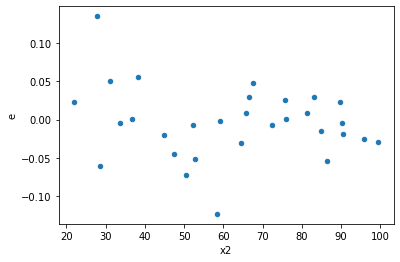

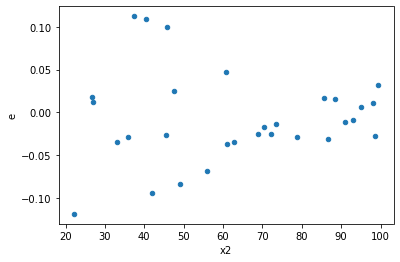

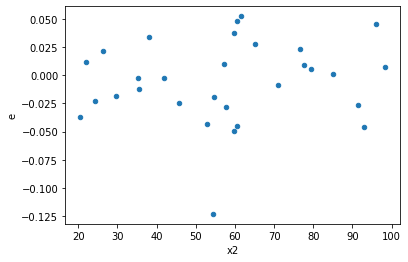

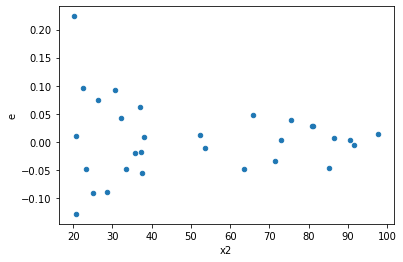

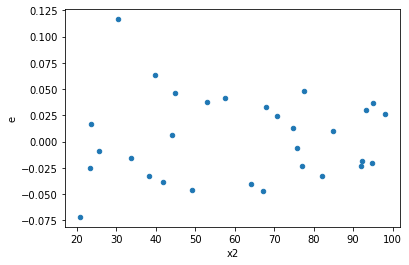

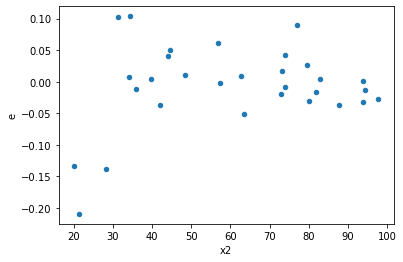

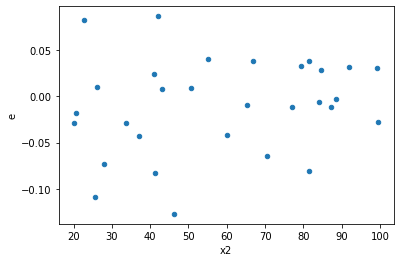

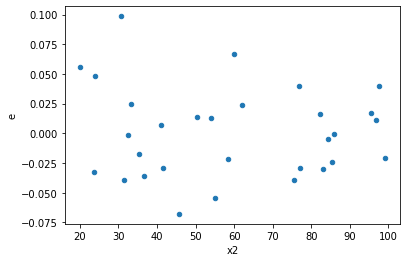

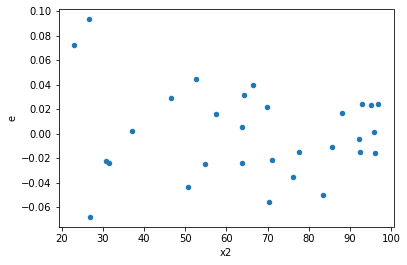

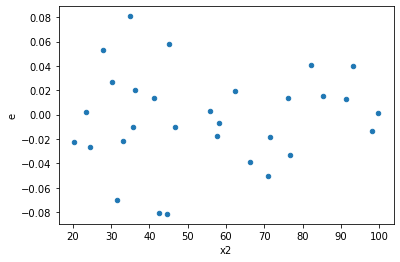

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["x1", "x2", "x3", "x4"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
1.0,11.0,11.0,0.010804890959748988,0.050818138469685185,0.0009822628145226353,0.00461983076997138,4.703253245127219,0.01632180474829692,0.9918390976258515,0.00816090237414846,Reject001=1 : Homoscedasticity
4.0,9.0,13.0,0.010273922917378246,0.021527111377446513,0.0011415469908198051,0.0016559316444189624,1.450603135688484,0.5251616645047021,0.7374191677476489,0.26258083225235107,Reject001=1 : Homoscedasticity
6.0,11.0,11.0,0.019805866966846865,0.03894914112403089,0.0018005333606224423,0.0035408310112755356,1.9665456295969292,0.2773156110536512,0.8613421944731744,0.1386578055268256,Reject001=1 : Homoscedasticity
7.0,9.0,13.0,0.01511916068229798,0.022309060126621427,0.0016799067424775533,0.0017160815482016483,1.021533817806305,0.9429256487538484,0.5285371756230758,0.4714628243769242,Reject001=1 : Homoscedasticity
8.0,12.0,10.0,0.014550611176420244,0.018199741864006923,0.0012125509313683537,0.0018199741864006924,1.5009465906284585,0.5281080588393201,0.73594597058034,0.26405402941966005,Reject001=1 : Homoscedasticity
9.0,9.0,13.0,0.005132467592594229,0.027337266947060592,0.0005702741769549143,0.00210286668823543,3.687466087740603,0.033333724464405634,0.9833331377677972,0.016666862232202817,Reject001=1 : Homoscedasticity
11.0,12.0,10.0,0.008656517384020103,0.011373433466664978,0.0007213764486683419,0.0011373433466664979,1.5766294405175403,0.47866980126306435,0.7606650993684678,0.23933490063153218,Reject001=1 : Homoscedasticity
12.0,12.0,10.0,0.0157271631742115,0.05817006499726444,0.0013105969311842918,0.005817006499726444,4.4384405009021615,0.024714634861095375,0.9876426825694523,0.012357317430547687,Reject001=1 : Homoscedasticity
14.0,13.0,9.0,0.005463263452790321,0.012018390435796233,0.00042025103483002473,0.0013353767150884703,3.1775691299096467,0.0885146805220618,0.9557426597389691,0.0442573402610309,Reject001=1 : Homoscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,14.0,8.0,0.02556437949079518,0.014100488805172225,0.00182602710648537,0.0017625611006465282,0.9652436671868483,0.9101037543936157,Reject001=1 : Homoscedasticity
1.0,11.0,11.0,0.010804890959748988,0.050818138469685185,0.0009822628145226353,0.00461983076997138,4.703253245127219,0.01632180474829692,Reject001=1 : Homoscedasticity
2.0,9.0,13.0,0.01996986095214658,0.01061395678424311,0.0022188734391273978,0.0008164582141725469,0.3679606956283321,0.13815835015317085,Reject001=1 : Homoscedasticity
3.0,10.0,12.0,0.053532780691485524,0.019963214449347847,0.005353278069148553,0.0016636012041123206,0.31076308434262206,0.07341541334361248,Reject001=1 : Homoscedasticity
4.0,9.0,13.0,0.010273922917378246,0.021527111377446513,0.0011415469908198051,0.0016559316444189624,1.450603135688484,0.5251616645047021,Reject001=1 : Homoscedasticity
5.0,16.0,6.0,0.09384118929698715,0.002885926550434708,0.005865074331061697,0.0004809877584057846,0.08200880862812801,6.838994474760935e-05,Reject001=0 : Heteroscedasticity
6.0,11.0,11.0,0.019805866966846865,0.03894914112403089,0.0018005333606224423,0.0035408310112755356,1.9665456295969292,0.2773156110536512,Reject001=1 : Homoscedasticity
7.0,9.0,13.0,0.01511916068229798,0.022309060126621427,0.0016799067424775533,0.0017160815482016483,1.021533817806305,0.9429256487538484,Reject001=1 : Homoscedasticity
8.0,12.0,10.0,0.014550611176420244,0.018199741864006923,0.0012125509313683537,0.0018199741864006924,1.5009465906284585,0.5281080588393201,Reject001=1 : Homoscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      874
Reject001=0 : Heteroscedasticity    126
Name: Result_test, dtype: int64